## Multiple Linear Regression

- regression having one dependent variable and multiple independent variables (>2)
- multivariate dataset

In [84]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('Advertising.csv')
print(df.head(10))

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6


In [86]:
corr = df.corr()
print(corr)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [100]:
# decide x and y
# x = ['TV', 'radio']
x = df.drop(['sales', 'newspaper'], axis=1)
y = df['sales']

In [101]:
# split the data into train and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

In [102]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

In [103]:
# print(x_train)
# print(y_train)

In [104]:
# predict x_test
y_prediction = model.predict(x_test)
# print(x_test)
# print(y_test)
print(y_prediction)

[ 7.02356787 18.57870332 11.78765376 19.68845601  9.6129145   6.49991683
 17.22538597 14.57893607 18.08339323 12.10654838  9.95497448 14.20559991
  6.02501656  7.35793681 12.4630078  17.02262823  8.84302434 13.2359572
 10.488196   13.83667136 14.73528677 19.74755798 17.07858032 20.38824586
 17.36180228 13.83101875 15.01387693  3.51286502  8.11248621 12.11414561
 10.69581134 20.33013767  8.85050392  9.09528654 19.42563114  7.8810059
 12.7139598  10.90632532 18.510139   17.07017534]


In [105]:
# evluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_prediction)
print(f"mean absolute error = {MAE}")

mean absolute error = 1.1426501317113615


In [106]:
MSE = mean_squared_error(y_test, y_prediction)
print(f"mean squared error = {MSE}")

mean squared error = 2.366757266918297


In [107]:
RMSE = np.sqrt(MSE)
print(f"root mean squared error = {RMSE}")

root mean squared error = 1.5384268805888361


In [108]:
R2 = r2_score(y_test, y_prediction)
print(f"R2 score = {R2}")

R2 score = 0.8853798068016628


In [109]:
print(x_test)
print(y_test)

        TV  radio
107   90.4    0.3
188  286.0   13.9
88    88.3   25.5
109  255.4   26.9
186  139.5    2.1
127   80.2    0.0
168  215.4   23.6
81   239.8    4.1
105  137.9   46.4
7    120.2   19.6
38    43.1   26.7
160  172.5   18.1
189   18.7   12.1
170   50.0   11.6
9    199.8    2.6
27   240.1   16.7
46    89.7    9.9
63   102.7   29.6
158   11.7   36.9
77   120.5   28.5
103  187.9   17.2
139  184.9   43.9
64   131.1   42.8
54   262.7   28.8
41   177.0   33.4
112  175.7   15.4
26   142.9   29.3
108   13.1    0.4
24    62.3   12.6
177  170.2    7.8
126    7.8   38.9
104  238.2   34.3
78     5.4   29.9
125   87.2   11.8
28   248.8   27.1
121   18.8   21.7
197  177.0    9.3
166   17.9   37.6
141  193.7   35.4
89   109.8   47.8
107     8.7
188    15.9
88     12.9
109    19.8
186    10.3
127     8.8
168    17.1
81     12.3
105    19.2
7      13.2
38     10.1
160    14.4
189     6.7
170     8.4
9      10.6
27     15.9
46     10.6
63     14.0
158     7.3
77     14.2
103    14.7
139    20.

### visualization

can **not** plot multiple input variables using 2d plot

Text(0.5, 1.0, 'Final Visualization')

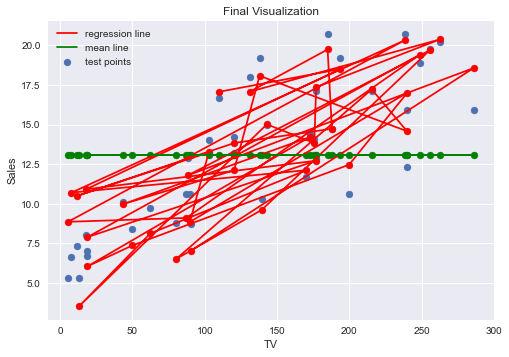

In [112]:
# plot all the experience and salary points from test dataset (observed)
plt.scatter(x_test['TV'], y_test, label="test points")
plt.style.use('seaborn')

# plot a best fit regression line
plt.scatter(x_test['TV'], y_prediction, color="red")
plt.plot(x_test['TV'], y_prediction, color="red", label="regression line")

# plot a mean line
y_mean = np.ones(len(y_test)) * y_test.mean() 
plt.plot(x_test['TV'], y_mean, color="green", label="mean line")
plt.scatter(x_test['TV'], y_mean, color="green")

plt.legend()
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Final Visualization")

### if plotted this happens